<div class="alert alert-block alert-info" >
    <h1>Machine Learning: Assignment 2</h1>
    <h2>This is a two week assignment</h2>
    <h3>General Information:</h3>
    <p>Feel free to add cells if required.<br> Feel free to write your own function block to reduce the redundancy.<br> Answers belong into the corresponding cells (below the question). <br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>). We don't consider that respective solution if you make this mistake (no excuse).</p>
    <br><br><b> Plot should have axis labels, grid, legend, title, atleast size 10X10 .Also give proper comments, function name, variable names to your coding, if you didn't follow the instructions there will be a reduction in the points.</b><br><br> 
     <br><br><b> Write sudo-code if you didn't get output or left out of time so that you will be awarded with atmost 50% of marks for that particular session.</b><br><br>
    <h3>Submission:</h3>
    <p>Use the following naming convention for your submissions: LA_FirstnameLastname_dateOfLecture, e.g LA_JohnDoe_YYMMDD
     <br><br>Please submit your notebook via LEA. The assignment is due on <b>$1^{st}$ May, Saturday at 18:00.</b> </p>
    <h3>Group Work:</h3>
    <p>You are allowed to work in groups of up to two people. Please enter the UID (your username here) of each member of the group into the next cell. We apply plagiarism checking, so do not submit solutions from other people except your team members. If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.</p>
    <p><b>YOU SHOULD ONLY SUBMIT EXACTLY ONE PER GROUP</b></p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions.</p></div>

In [1]:
'''
Group Work:
Enter the UID (i.e. student2s) of each team member into the variables. 
If you work alone please leave the second variable empty, or extend the list if necessary.
'''
member1 = 'Syed Mushrraf Ali (sali2s, 9040658)'
member2 = 'Shalaka Satheesh (ssathe2s, 9040760)'

# Build a spam classifier using Naive Bayes[100 points]

In [2]:
#Headers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#Include your other headers here

# import nltk
# nltk.download('stopwords')
import re
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
#https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
# import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
#https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

## PLEASE CHECK IF WORD CLOUD IS INSTALLED
## If not, please run the cell below to install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
pip install wordcloud

You should consider upgrading via the 'C:\Users\alex0\anaconda3\python.exe -m pip install --upgrade pip' command.


## Step 1:- Load your data[10 points]
#### There are three datasets for training: TrainDataset1.csv, TrainDataset2.csv and TrainDataset3.txt. Each dataset contains short messages with the labels (ham or spam). Load the dataset using pandas.

In [4]:
#Load your dataset in this cell
def loadData(file_name):
    split_text = file_name.split(".")
    if split_text[-1] == 'csv':
        Train_data = pd.read_csv(file_name)
    else:
    #https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas
        Train_data = pd.read_csv(file_name, delimiter='\t',header=None, )
    
    
    Train_data.columns = ["label", "sentence"]
    
    return Train_data
Train_data_1 = loadData("TrainDataset1.csv")
Train_data_2 = loadData("TrainDataset2.csv")
Train_data_3 = loadData("TrainDataset3.txt")

Train_data = pd.concat([Train_data_1, Train_data_2, Train_data_3])
Train_data.head()

,label,sentence
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


## Step 2:- Preprocess the data[20 points]
#### Analyse the data, for this you will need to process the text, namely remove punctuation and stopwords, and then create a list of clean text words (Research how to do this [Hint:- see how the texts are pre-processed in Natural Language Processing]) use any libraries that you feel comfortable. Now Combine them into one big data set for the training.

In [5]:
#https://machinelearningmastery.com/clean-text-machine-learning-python/
#https://stackoverflow.com/questions/23175809/str-translate-gives-typeerror-translate-takes-one-argument-2-given-worked-i


#Pre-process the data
def preProcessing(sentence):
    #lowering the text
    sentence = sentence.lower()
    #replacing full stops with space
    sentence = sentence.replace(".", " ")
    #removing punctuations
    sentence = sentence.translate(str.maketrans('','',string.punctuation))

    #tokenizing the sentence
    #tokens = sentence.split(' ')
    tokens = word_tokenize(sentence)
    
    #remove hyperlinks
    tokens = [re.sub(r"http\S+", "", word) for word in tokens]
    
    #removing numbers
    tokens = [re.sub(r"\d+", "", word) for word in tokens]
    
    #replacing new line
    tokens = [word.replace('\n','') for word in tokens]
    #to remove end spaces
    tokens = [token.strip() for token in tokens]
    #removing stopwords(sw)
    tokens = [word for word in tokens if word not in stop_words]
    #making a string to remove punctuations
    tokens = [word for word in tokens if len(word)>1]

    text = ' '.join(tokens)

#     text = text.translate(str.maketrans('','',"'0','1','2','3','4','5','6','7','8','9'"))
    return text



def return_preprocessed_dataset(dataset):
    
    list_words = [preProcessing(sentence) for sentence in dataset.loc[:,'sentence']]
    dataset['preprocessed_sentence'] = list_words
    return dataset

def map_labels(dataset):
    
#mapping labels of classifier ham = 0, spam = 1
    dataset['label_mapped'] = dataset.label.map({
        'ham':0,
        'spam':1
    })
    return dataset

def pipeline_preprocess(dataset):
    dataset = return_preprocessed_dataset(dataset)
    dataset = map_labels(dataset)
    return dataset

Train_data = pipeline_preprocess(Train_data)
Train_data.head()

,label,sentence,preprocessed_sentence,label_mapped
0,ham,Hope you are having a good week. Just checking in,hope good week checking,0
1,ham,K..give back my thanks.,give back thanks,0
2,ham,Am also doing in cbe only. But have to pay.,also cbe pay,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",complimentary star ibiza holiday cash needs ur...,1
4,spam,okmail: Dear Dave this is your final notice to...,okmail dear dave final notice collect tenerife...,1


## Step 3:- Visualise the data[20 points]
#### Try to visualize and analyse the data such as before and after pre processing, number of ham/spam etc. Analyse as many verticals you can, feel free to use graphical libraries like seaborn.

In [23]:
def createWordCloud(dataset):
    # convert to string
    text = dataset.astype('str').values
    # create word cloud
    wordcloud = WordCloud(width = 1000, height = 500).generate(str(text))
    return wordcloud

def frequencyPlot(dataset, title):
    # find the counts of spam/ham mails and plot as a pie chart
    dataset['label'].value_counts().plot(kind='pie', autopct='%.2f', fontsize=20, legend = False)
    plt.subplots_adjust(left=None, bottom=None, right=2.5, top=None, wspace=None, hspace=None)
    plt.title("Distribution of Spam and Ham")
    plt.show()

def createWordPlot(a, title):
    # This is to plot the wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(a, interpolation='bilinear')
    plt.title(title)
    plt.show()

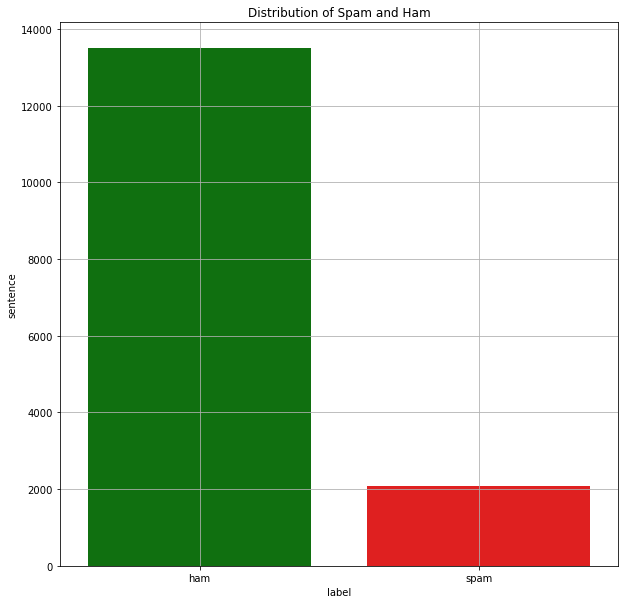

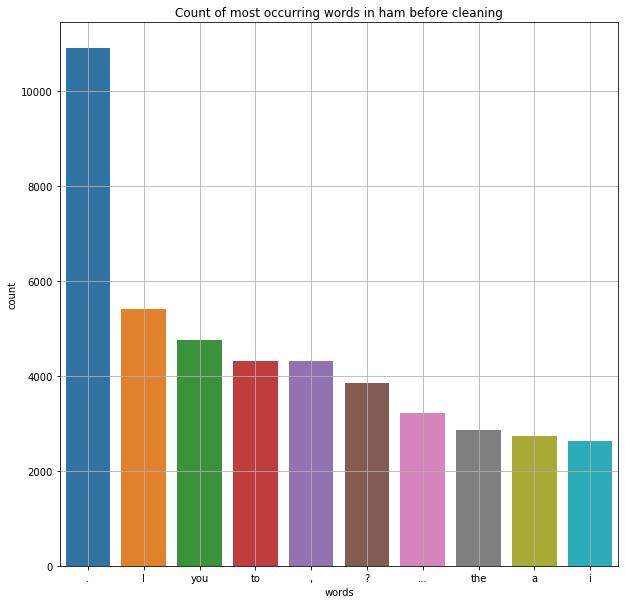

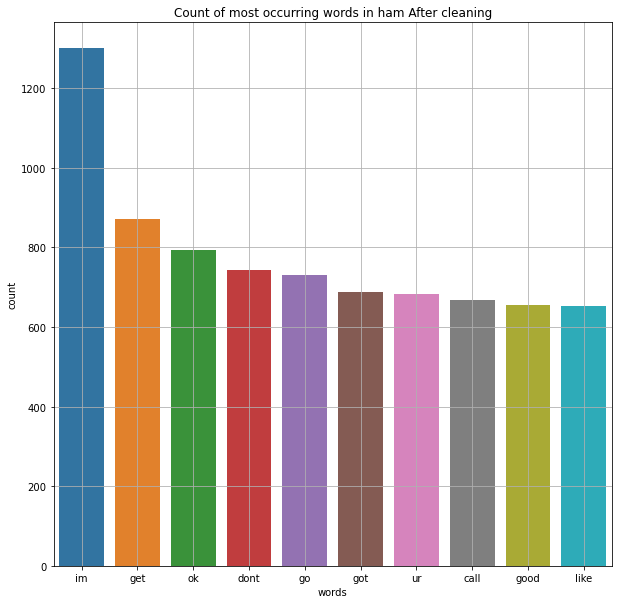

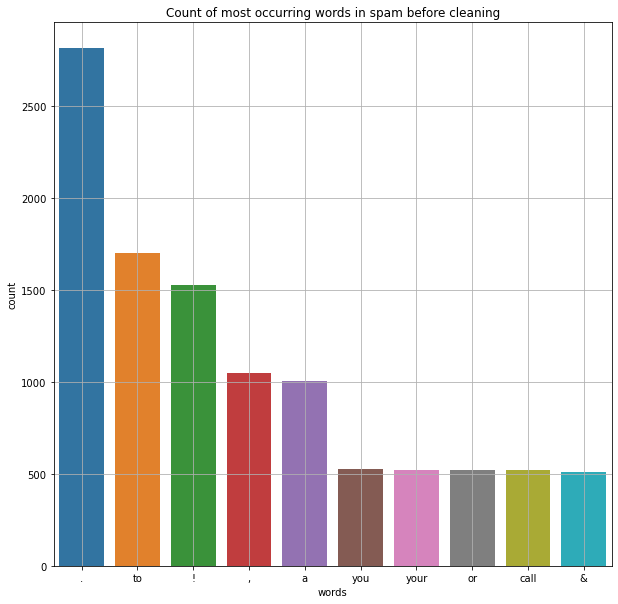

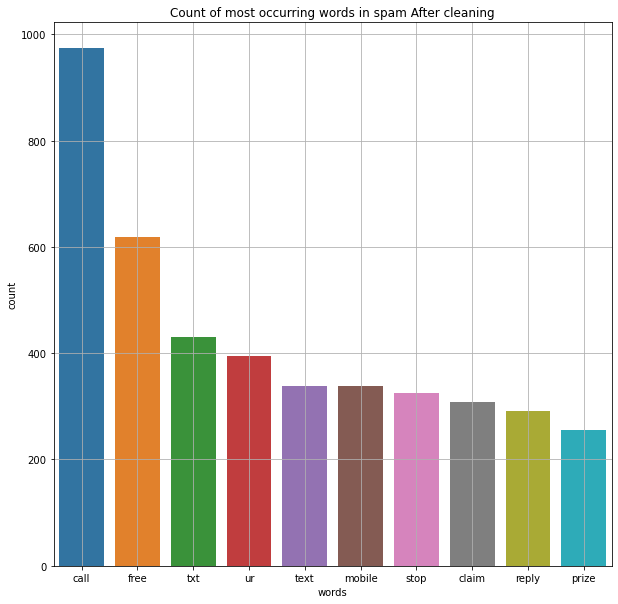

In [20]:
#all of training data 
'''bar plots for quantity of spams and ham'''

plt.figure(figsize = (10,10))
count_label = Train_data.groupby(['label']).count().reset_index()
sns.barplot(x = 'label', y = 'sentence', data = count_label, palette = ['green', 'red'])
plt.title("Distribution of Spam and Ham")
plt.grid()
plt.show()


def plot_most_occur_word( label, title, preprocess, frequency = 10,data_set = Train_data):
    if preprocess:
        list_words =  [word_tokenize(sentence) for sentence in data_set.loc[data_set.label == label,'preprocessed_sentence']]
    else:
        list_words = [word_tokenize(sentence) for sentence in data_set.loc[data_set.label == label,'sentence']]
    
    #function to flaten the list
    flatten = itertools.chain.from_iterable
    #getting only list of words 
    list_words = list(flatten(list_words))
    #creating dataframe and other to get sorted count
    word_list = pd.DataFrame(list_words, columns=['words'])
    word_list['count'] = [i for i in range(len(list_words))]
    #getting only top 10 words
    top_10 = word_list.groupby(['words']).count().sort_values(by = 'count', ascending = False).reset_index()[:frequency]
    plt.figure(figsize = (10,10))
    sns.barplot(x = 'words', y = 'count', data = top_10)
    plt.title(title)
    plt.grid()
    plt.show()


'''count of most occurring words in ham before cleaning'''
plot_most_occur_word('ham',
                    "Count of most occurring words in ham before cleaning",
                    False)



'''count of most occurring words in ham After cleaning'''

plot_most_occur_word('ham',
                    "Count of most occurring words in ham After cleaning",
                    True)

'''count of most occurring words in spam before cleaning'''
plot_most_occur_word('spam',
                    "Count of most occurring words in spam before cleaning",
                    False)



'''count of most occurring words in spam After cleaning'''

plot_most_occur_word('spam',
                    "Count of most occurring words in spam After cleaning",
                    True)

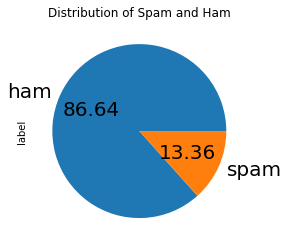

In [21]:
frequencyPlot(Train_data, 'Distribution of Spam and Ham mails in the dataset')

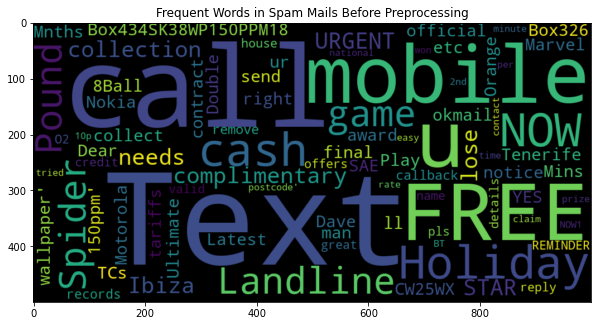

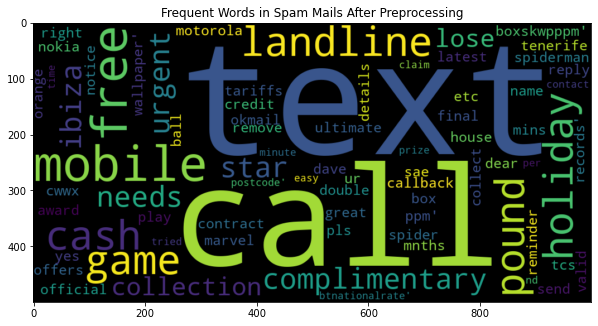

In [24]:
# WORDCLOUD BEFORE PREPROCESSING

wordcloud1 = createWordCloud(Train_data.loc[Train_data['label'] == 'spam']['sentence'])

createWordPlot(wordcloud1,'Frequent Words in Spam Mails Before Preprocessing')

# WORDCLOUD AFTER PREPROCESSING

wordcloud2 = createWordCloud(Train_data.loc[Train_data['label'] == 'spam']['preprocessed_sentence'])

createWordPlot(wordcloud2, 'Frequent Words in Spam Mails After Preprocessing')

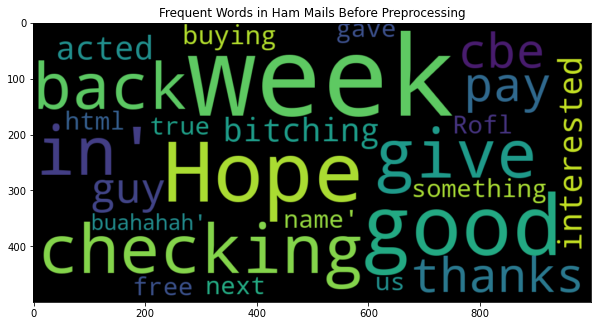

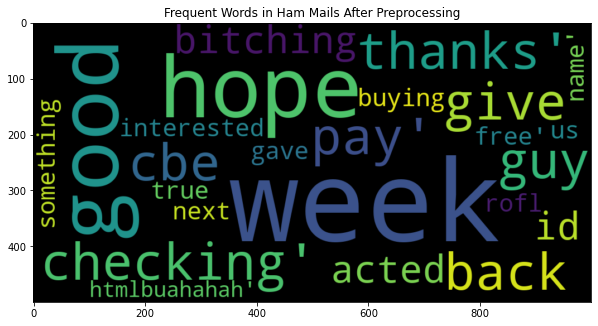

In [25]:
# WORDCLOUD BEFORE PREPROCESSING

wordcloud1 = createWordCloud(Train_data.loc[Train_data['label'] == 'ham']['sentence'])

createWordPlot(wordcloud1,'Frequent Words in Ham Mails Before Preprocessing')

# WORDCLOUD AFTER PREPROCESSING

wordcloud2 = createWordCloud(Train_data.loc[Train_data['label'] == 'ham']['preprocessed_sentence'])

createWordPlot(wordcloud2, 'Frequent Words in Ham Mails After Preprocessing')

## Step 4:- Build, train and validate the classifer, [20 points]

### Training on supervised data (labelled data)

#### Use the data in order to build your own Naive Bayes classifier (You can either use existing Naive Bayes from sklearn or build your own). Build the classifier, train it and then validate. Provide your result in confusion matrix (use heatmap from seaborn) along with the classification report from sklearn. Validation accuracy should be around 99%.

Classification report for Training set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10109
           1       1.00      0.93      0.96      1582

    accuracy                           0.99     11691
   macro avg       0.99      0.97      0.98     11691
weighted avg       0.99      0.99      0.99     11691

Classification report for Validation set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3397
           1       0.99      0.93      0.96       501

    accuracy                           0.99      3898
   macro avg       0.99      0.97      0.98      3898
weighted avg       0.99      0.99      0.99      3898



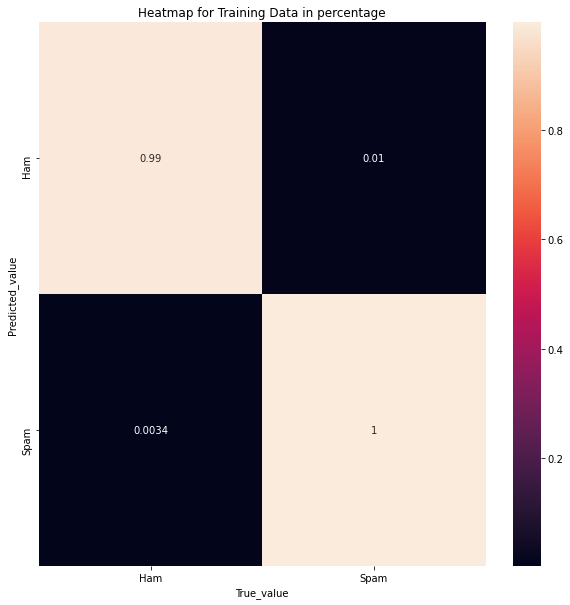

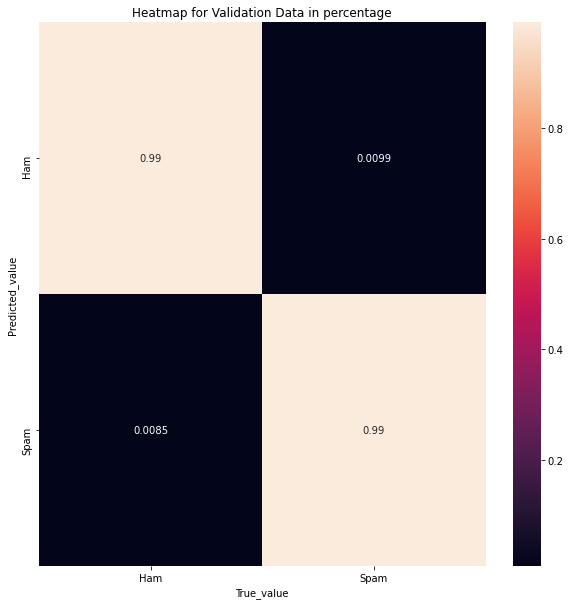

In [11]:
# Build, train and validate the classifier, 


#splitting the data to train and validation set
X_train, X_val, y_train, y_val = train_test_split(Train_data['preprocessed_sentence'].values,
                                                  Train_data['label_mapped'].values, test_size=0.25, random_state=42)
#defining TFidf to get embeddings
vectorizer = TfidfVectorizer()
#getting train and validation embedding
X_train_tfidf = vectorizer.fit_transform(X_train)

X_val_tfidf = vectorizer.transform(X_val)

#initializing the classifier
classifier =  MultinomialNB()
#fitting the classifier
classifier.fit(X_train_tfidf.toarray(), y_train)

train_prediction = classifier.predict(X_train_tfidf.toarray())
print("Classification report for Training set:")
print("=========================================")
print(classification_report(y_train, train_prediction))

val_prediction = classifier.predict(X_val_tfidf.toarray())
print("Classification report for Validation set:")
print("=========================================")
print(classification_report( y_val, val_prediction))


#Training Data
#data frame for heatmap
data_heatmap = pd.DataFrame({
    "True_value" : y_train,
    "Predicted_value":train_prediction
})
#mapping labels for true and predicted column
data_heatmap['True_value'] = data_heatmap['True_value'].map({
    1:'Spam',
    0:'Ham'
})
data_heatmap['Predicted_value'] = data_heatmap['Predicted_value'].map({
    1:'Spam',
    0:'Ham'
})
cont_table_heatmap = pd.crosstab(data_heatmap['Predicted_value'],data_heatmap['True_value'],normalize='index',)
plt.figure(figsize = (10,10))
sns.heatmap(cont_table_heatmap,annot=True)
plt.title("Heatmap for Training Data in percentage")
plt.show()


#Validation Data
#dataframe for heatmap
data_heatmap = pd.DataFrame({
    "True_value" : y_val,
    "Predicted_value":val_prediction
})

#mapping labels for true and predicted column
data_heatmap['True_value'] = data_heatmap['True_value'].map({
    1:'Spam',
    0:'Ham'
})
data_heatmap['Predicted_value'] = data_heatmap['Predicted_value'].map({
    1:'Spam',
    0:'Ham'
})
cont_table_heatmap = pd.crosstab(data_heatmap['Predicted_value'],data_heatmap['True_value'],normalize='index',)
plt.figure(figsize = (10,10))
sns.heatmap(cont_table_heatmap,annot=True)
plt.title("Heatmap for Validation Data in percentage")
plt.show()



## Step 5:- Test the classifier[10 points]

### Supervised classification[5 points] 

#### Test your Classifier using  the SMSSpamCollection.txt dataset provide a heatmap and classification report. Test accuracy should be around 99%.


Classification report for SMSSpamCollection.txt dataset:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4825
           1       1.00      0.93      0.96       747

    accuracy                           0.99      5572
   macro avg       0.99      0.97      0.98      5572
weighted avg       0.99      0.99      0.99      5572



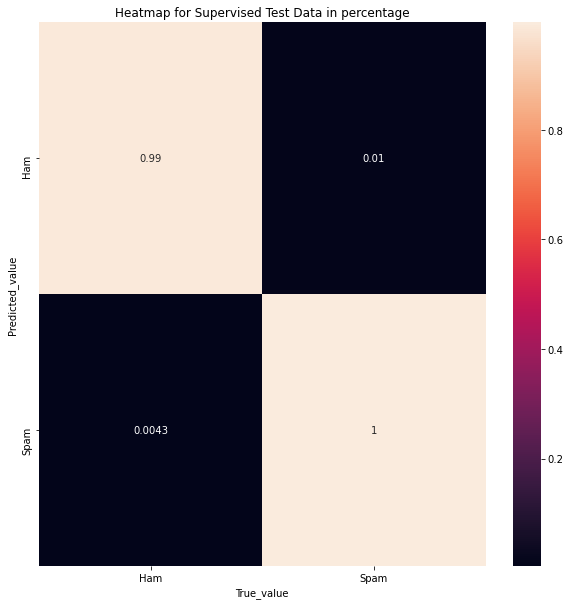

In [18]:
# Test the classifier
test_supervised = loadData("SMSSpamCollection.txt")
test_supervised = pipeline_preprocess(test_supervised)

test_supervised_emb = vectorizer.transform(test_supervised['preprocessed_sentence'].values)
test_super_pred = classifier.predict(test_supervised_emb.toarray())

print("Classification report for SMSSpamCollection.txt dataset:")
print("=========================================================")
print(classification_report( test_supervised['label_mapped'], test_super_pred))

#Training Data
data_heatmap = pd.DataFrame({
    "True_value" : test_supervised['label_mapped'],
    "Predicted_value": test_super_pred
})
data_heatmap['True_value'] = data_heatmap['True_value'].map({
    1:'Spam',
    0:'Ham'
})
data_heatmap['Predicted_value'] = data_heatmap['Predicted_value'].map({
    1:'Spam',
    0:'Ham'
})
cont_table_heatmap = pd.crosstab(data_heatmap['Predicted_value'],data_heatmap['True_value'],normalize='index',)
plt.figure(figsize = (10,10))
sns.heatmap(cont_table_heatmap,annot=True)
plt.title("Heatmap for Supervised Test Data in percentage")
plt.show()



### Unsupervised classification[5 points] 

#### Test your Classifier using  the TestDataset.csv dataset. This dataset is not labelled so kindly predict the labels and visualise it[5 points].

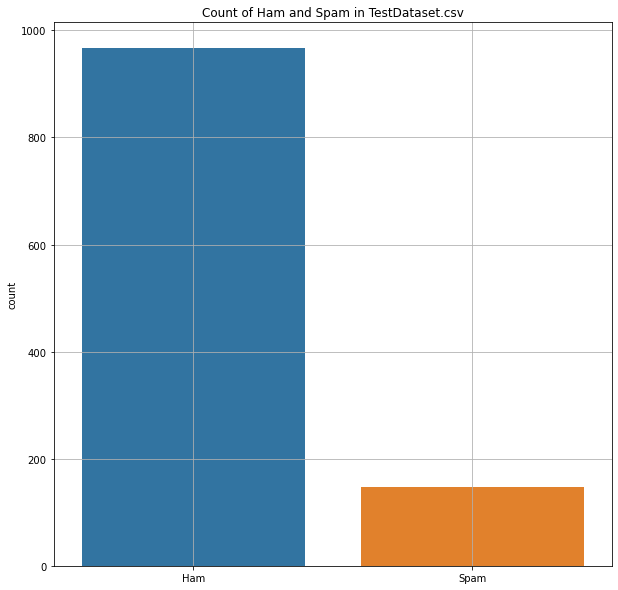

In [16]:
# Test the classifier
test_unsuper = pd.read_csv('TestDataset.csv')
test_unsuper.columns = ['sentence']
test_unsuper = return_preprocessed_dataset(test_unsuper)
test_unsuper_emb = vectorizer.transform(test_unsuper['preprocessed_sentence'].values)
prediction = classifier.predict(test_unsuper_emb.toarray())
plt.figure(figsize = (10,10))
sns.countplot(prediction)
plt.xticks([0,1],['Ham', 'Spam'])
plt.title("Count of Ham and Spam in TestDataset.csv")
plt.grid()
plt.show()

## Step 6:- Cheat the classifier[20 points]

#### Try to cheat the classifier by adding "good words" to the end of test dataset(TestDataset.csv) e.g:- Oh! no share Market has fallen down by $100,000 due to Corona outbreak... try mixing up spam and ham words see how the classifier works. Output the results in a good format to validate your work[15 points]  

In [14]:
# Cheat the classifier
'''
Frequent Spam Words:
    call, free, txt, ur, text, mobile, stop, claim, reply, prize
    
Frequent Ham Words:
    im, get, ok, dont, go, got, ur, call, good, like
'''

def reverseEncode(label):
    if label == 1:
        return 'spam'
    elif label == 0:
        return 'ham'

#first example. Here 'claim' is the word which cause the classifier 
# to predict the mail as a spam mail. Replacing a character in 'claim',
# the classifier classifier the spam mail as a ham mail.
print('The sentence "your money claim is this" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["your money claim is this"]))))
print('The sentence "your money cl@im is this" is ',
      reverseEncode(classifier.predict(vectorizer.transform(["your money cl@im is this"]))))

print('='*50)

#second exmaple. Here the decisive words are 'free' and 'call' (but not 'mobile')
print('The sentence "call me on mobile for free" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["call me on mobile for free"]))))
print('The sentence "call me on m0bile for free" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["call me on m0bile for free"]))))
print('The sentence "call me on m0bile for frees" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["call me on m0bile for frees"]))))
print('The sentence "ca!l me on m0bile for free" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["ca!l me on m0bile for free"]))))

print('='*50)

#third example. Here adding ham words like 'good', 'great' 
# and 'wish' to spam mails fools the classifier
print('The sentence "claim your reward now" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["claim your reward now"]))))
print('The sentence "claim your reward now wish good great" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["claim your reward now wish good great"]))))
print('The sentence "call me on mobile for free" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["call me on mobile for free"]))))
print('The sentence "call me on mobile for free wish good great" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["call me on mobile for free wish good great"]))))
print('The sentence "urgently call me  for your reward" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["urgently call me for your reward"]))))
print('The sentence "urgently call me  for your reward wish good great" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["urgently call me for your reward wish good great"]))))

print('='*50)

#fourth example. "dont", "go", "good" are ham words, when "stop" and "prize" 
# were added then no effect 
# but when "dont go" removed then spam. Here "stop" is the main word.
print('The sentence "dont go you have good" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["dont go you have good"]))))
print('The sentence "dont go you have good prize" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["dont go you have good prize"]))))
print('The sentence "dont go stop you have good prize" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["dont go stop you have good prize"]))))
print('The sentence "stop you have good prize" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["stop you have good prize"]))))
print('The sentence "st0p you have good prize" is ', 
      reverseEncode(classifier.predict(vectorizer.transform(["st0p you have good prize"]))))

The sentence "your money claim is this" is  spam
The sentence "your money cl@im is this" is  ham
The sentence "call me on mobile for free" is  spam
The sentence "call me on m0bile for free" is  spam
The sentence "call me on m0bile for frees" is  ham
The sentence "ca!l me on m0bile for free" is  ham
The sentence "claim your reward now" is  spam
The sentence "claim your reward now wish good great" is  ham
The sentence "call me on mobile for free" is  spam
The sentence "call me on mobile for free wish good great" is  ham
The sentence "urgently call me  for your reward" is  spam
The sentence "urgently call me  for your reward wish good great" is  ham
The sentence "dont go you have good" is  ham
The sentence "dont go you have good prize" is  ham
The sentence "dont go stop you have good prize" is  ham
The sentence "stop you have good prize" is  spam
The sentence "st0p you have good prize" is  ham


In [15]:
# Example 5

# Find the top few common ham/spam mails
def most_common_words(label, frequency = 10, data_set = Train_data):
    
    list_words =  [word_tokenize(sentence) for sentence in data_set.loc[data_set.label == label,'preprocessed_sentence']]
        
    #function to flaten the list
    flatten = itertools.chain.from_iterable
    #getting only list of words 
    list_words = list(flatten(list_words))
    #creating dataframe and other to get sorted count
    word_list = pd.DataFrame(list_words, columns=['words'])
    word_list['count'] = [i for i in range(len(list_words))]
    #getting only top 10 words
    top_10 = word_list.groupby(['words']).count().sort_values(by = 'count', ascending = False).reset_index()[:frequency]
    
    return top_10

top_ham_words = most_common_words('ham', 20)['words']
top_spam_words = most_common_words('spam', 20)['words']

# Find 10 spam mails and add top ham words to them
poisoned_sentences = []
for sentence in Train_data.loc[Train_data.label == 'spam','preprocessed_sentence'][:10]:
    poisoned_sentences.append((top_ham_words)[0]+' '+\
                              (top_ham_words)[1]+' '+(top_ham_words)[2]+\
                              ' '+(top_ham_words)[3]+' '+(top_ham_words)[4]+\
                              ' '+(top_ham_words)[5]+' '+str(sentence)+' '+(top_ham_words)[0]+' '+\
                              (top_ham_words)[1]+' '+(top_ham_words)[2]+\
                              ' '+(top_ham_words)[3]+' '+(top_ham_words)[4]+\
                              ' '+(top_ham_words)[5])


for sentence in poisoned_sentences:
    if reverseEncode(classifier.predict(vectorizer.transform([sentence]))) == 'ham':
        print('The poisoned spam mail "'+sentence+'" is now classified as', 
          reverseEncode(classifier.predict(vectorizer.transform([sentence]))))
        print()
    
# 4 out of the 10 spam mails are now classified as ham

The poisoned spam mail "im get ok dont go got complimentary star ibiza holiday cash needs urgent collection landline lose boxskwpppm im get ok dont go got" is now classified as ham

The poisoned spam mail "im get ok dont go got marvel mobile play official ultimate spiderman game ur mobile right text spider game send free ball wallpaper im get ok dont go got" is now classified as ham

The poisoned spam mail "im get ok dont go got nokia plus free digital camera get win free auction take part send nokia poboxtcrw im get ok dont go got" is now classified as ham

The poisoned spam mail "im get ok dont go got girls many local virgins ready fil ur every sexual need fil text cute im get ok dont go got" is now classified as ham



#### Write your analysis of how you intended to cheat the classifier and how it performed in few words (provide your inference)[5 points]

Bayesian Poisoning is a commonly used method to fool or cheat the Naive Bayes Spam Classifiers. Here, spam mails are inserted with token words that are normally associated with ham mails. 

In our case, the most common words that occur in a ham mail are: \
'im, get, ok, dont, go, got, ur, call, good, like, know, come, ill, time, love, day, ltgt, going, lor, home'

**Inserting these ham words into the spam mails** increases the probability of the classifier classifying the spam mail as a ham mail. (Demonstrated in examples 3, 4 and 6)

The most frequent spam words are:\
'call, free, txt, ur, text, mobile, stop, claim, reply, prize, get, www, å£, nokia, new, send, win, cash, urgent, please,'

It is also possible to fool the classifier by **transforming these spam words** - by replacing some characters in the spam words with other other characters. (Demonstrated in examples 1 and 2). This can be prevented by using fastext word embedding for vectorising the words, which will find an embedding for not only every word in vocab but also for derivates of the vocab words.

### Help

<a href="https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering" target="_top">Spam Filtering using Naive Bayes</a><br>
<a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_top">Seaborn Heatmap</a><br>
<a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_top">Sklearn Naive Bayes</a><br>
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html" target="_top">Sklearn Metrics</a><br>
<a href="https://pandas.pydata.org/docs/getting_started/index.html#getting-started" target="_top">Intro to Pandas</a>